In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

##### PyTorch Dataset Class

In [2]:
# root vị trí lưu trữ dữ liệu
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [5]:
# Kiểm tra độ dài của dữ liệu
len(train_set)

60000

In [6]:
# Kiểm tra nhãn của dữ liệu
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
# Kiểm tra số lượng của từng nhãn
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [8]:
# Xử lý dữ liệu
sample = next(iter(train_set))

In [9]:
len(sample)

2

In [10]:
image, label = sample

In [11]:
type(image)

torch.Tensor

In [12]:
type(label)

int

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
torch.tensor(label).shape

torch.Size([])

In [15]:
image.squeeze().shape

torch.Size([28, 28])

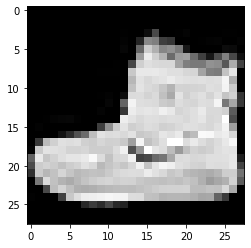

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(image.squeeze(), cmap="gray")

In [17]:
torch.tensor(label)

tensor(9)

##### PyTorch DataLoader Class

In [18]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=1000
    ,shuffle=True
)

In [19]:
display_loader = torch.utils.data.DataLoader(
    train_set, batch_size=10
)

In [20]:
batch = next(iter(display_loader))

In [21]:
print('len:', len(batch))

len: 2


In [22]:
images, labels = batch

In [23]:
 print('types:', type(images), type(labels))

types: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [24]:
print('shapes:', images.shape, labels.shape)

shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [25]:
grid = torchvision.utils.make_grid(images, nrow=10)

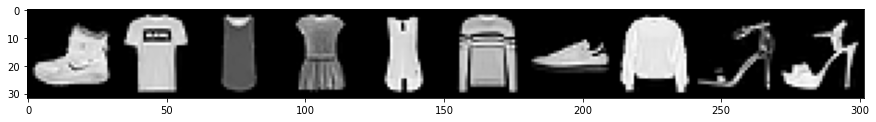

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [27]:
print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


In [28]:
grid = torchvision.utils.make_grid(images, nrow=10)

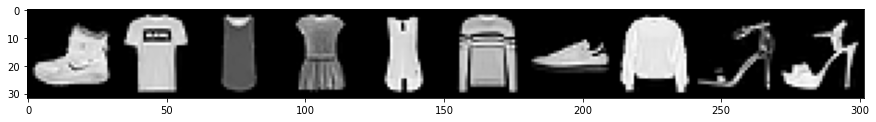

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

In [30]:
print('labels:', labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


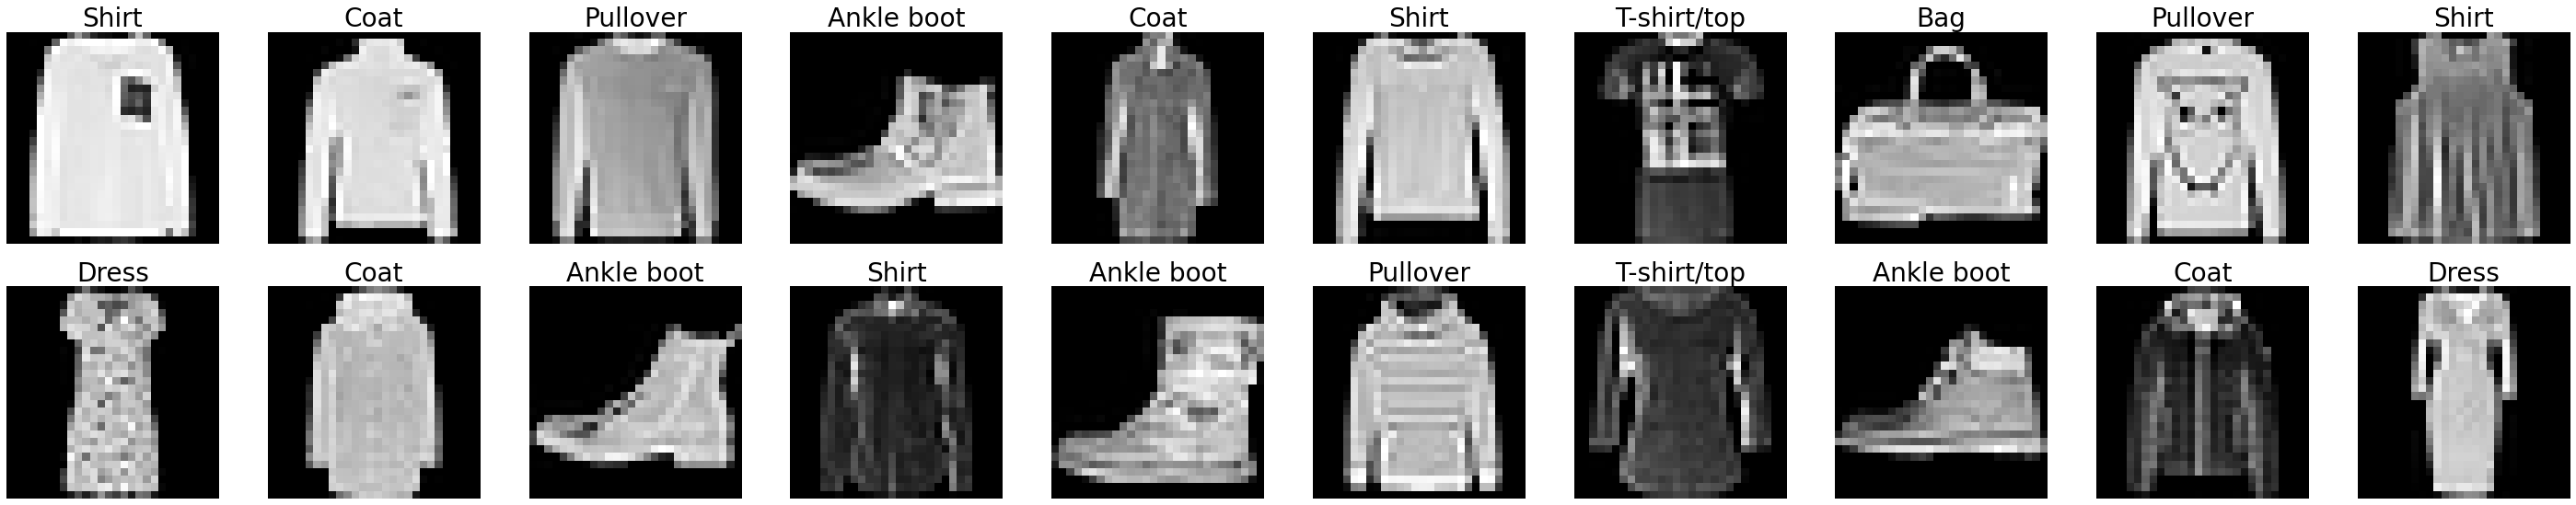

In [31]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()